In [103]:
import os
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import pymorphy2


In [2]:
def preproc_corpus(path):

    texts = []
    for fname in os.listdir(path):
        if not fname.endswith('.txt'):
            continue
        with open(path + '/' + fname) as f:
            text = f.read()
            texts.append(text)
    return texts

In [3]:
texts = preproc_corpus('.')
len(texts)

2

In [4]:
a = texts[0]+texts[1]

In [5]:
!pip install pymystem3

In [6]:
import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

#Examples    
prepoc_text = preprocess_text(a)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
len(prepoc_text), prepoc_text[:1000]

(516363,
 '\ufeff ваал нум вэсако ӈа вэсако вместе жить земля кругом вода остров нум вэсако вокруг посмотреть  —  никто говорить : « посмотреть вниз ничто вода остров земля сделать » спускаться остров нум вэсако ӈа вэсако становиться рука копать настоящий земля сделать нум вэсако сделать река ӈа вэсако сделать болото бугор приходить пора делать человек нум вэсако сделать настоящий человек ӈа вэсако  —  ӈаятар сюдбя парнэ пойти нум вэсако свой человек оживлять ӈа вэсако оставаться говорить : « что-то долго свой человек оживлять » поставлять нога дохнуть  —  пойти вернуться нум вэсако говорить : « оживлять сказать место сидеть »  нум вэсако сделать дикий олень ӈа вэсако  —  волк собака нум вэсако сказать : « сидеть место оживлять » уходить нум вэсако подождать ӈа вэсако говорить : « попробовать оживлять »  дохнуть олень волк шерсть появляться нум вэсако приходить говорить : « сделать шерсть вырастать »  нум вэсако говорить : « сделать лес » сделать лес нум вэсако говорить : « жить вверху

In [8]:
tokens = gensim.utils.simple_preprocess(prepoc_text, deacc=True)

In [39]:
spot_words = []
with open('stop.txt','r') as f:
    spot_words = list(set(f.read().split()))

In [40]:
lemma_stop = [w for w in tokens if not w in spot_words]
# lemma_stop 

In [20]:
len([w for w in lemma_stop if w.startswith('котор')])

178

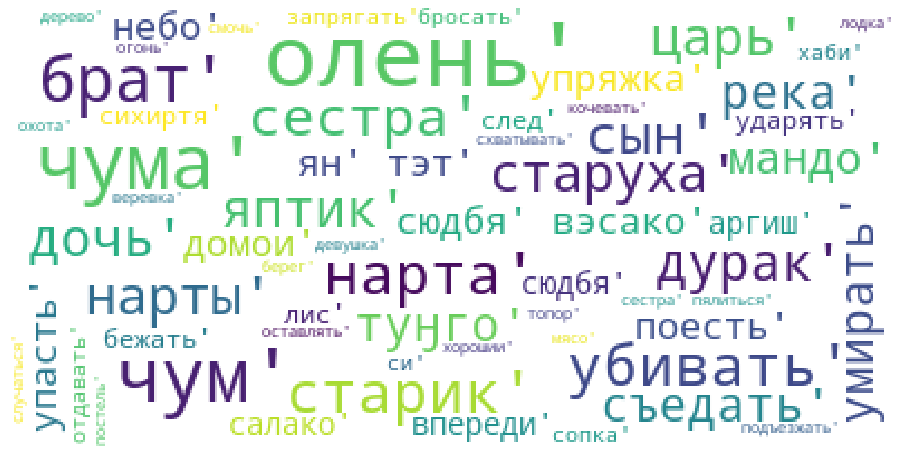

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud

mpl.rcParams['figure.figsize']=(16.0,16.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

wordcloud = WordCloud(
                          background_color='white',
                          max_words=60,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(lemma_stop))

# print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [46]:
import plotly.graph_objects as go

In [48]:
def get_top_n_words(corpus, n=None):
    corpus = lemma_stop
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lemma_stop, 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df2
# fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
# fig.update_layout(title=go.layout.Title(text="Top 30 unigrams"))
# fig.show()

,unigram,count
0,олень,872
1,чум,579
2,чума,440
3,сын,405
4,брат,371
5,вэсако,353
6,сестра,337
7,сюдбя,335
8,нарта,276
9,старик,257


In [50]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams

In [91]:
esBigrams_2 = list(ngrams(lemma_stop, 2))
# esBigrams[:10]

In [92]:
esBigramFreq_2 = collections.Counter(esBigrams_2)
esBigramFreq_2.most_common(100)
# esBigramFreq

[(('сюдбя', 'вэсако'), 110),
 (('ян', 'тэт'), 105),
 (('сестра', 'пялиться'), 76),
 (('сало', 'ян'), 63),
 (('вадися', 'салако'), 52),
 (('сюдбя', 'хэтанзя'), 51),
 (('мяцг', 'хасава'), 49),
 (('сеи', 'ню'), 48),
 (('сын', 'хаби'), 44),
 (('юныи', 'ню'), 43),
 (('железныи', 'лыжа'), 42),
 (('дикии', 'олень'), 38),
 (('чум', 'поставлять'), 38),
 (('луца', 'вэсако'), 36),
 (('вождь', 'враг'), 36),
 (('таибарь', 'вэсако'), 35),
 (('чум', 'входить'), 34),
 (('мяч', 'великан'), 34),
 (('тысяча', 'олень'), 33),
 (('бедныи', 'хороль'), 33),
 (('входить', 'чум'), 30),
 (('тобтака', 'папа'), 29),
 (('хаби', 'вэсако'), 29),
 (('сирота', 'хоплять'), 28),
 (('хаби', 'ервы'), 28),
 (('пучи', 'мэбит'), 28),
 (('красныи', 'олень'), 28),
 (('играть', 'мяч'), 28),
 (('железныи', 'узда'), 27),
 (('нум', 'вэсако'), 26),
 (('предводитель', 'тасинянгы'), 26),
 (('среднии', 'брат'), 25),
 (('среднии', 'сын'), 25),
 (('пии', 'сеи'), 25),
 (('поставлять', 'чум'), 24),
 (('иба', 'сеи'), 24),
 (('заити', 'чум')

In [93]:
esBigrams_3 = list(ngrams(lemma_stop, 3))

In [97]:
esBigrams_3[:10]

[('ваал', 'нум', 'вэсако'),
 ('нум', 'вэсако', 'ӈа'),
 ('вэсако', 'ӈа', 'вэсако'),
 ('ӈа', 'вэсако', 'остров'),
 ('вэсако', 'остров', 'нум'),
 ('остров', 'нум', 'вэсако'),
 ('нум', 'вэсако', 'остров'),
 ('вэсако', 'остров', 'спускаться'),
 ('остров', 'спускаться', 'остров'),
 ('спускаться', 'остров', 'нум')]

In [95]:
esBigramFreq_3 = collections.Counter(esBigrams_3)
esBigramFreq_3.most_common(50)

[(('сало', 'ян', 'тэт'), 63),
 (('играть', 'мяч', 'великан'), 27),
 (('пии', 'сеи', 'ню'), 25),
 (('иба', 'сеи', 'ню'), 23),
 (('сэр', 'лимпя', 'пыя'), 17),
 (('царь', 'слуга', 'лиса'), 16),
 (('среднии', 'сын', 'хаби'), 15),
 (('валун', 'играть', 'мяч'), 15),
 (('сын', 'нум', 'касава'), 13),
 (('сыромятныи', 'коровии', 'шкура'), 13),
 (('ню', 'пии', 'сеи'), 12),
 (('сын', 'тирнии', 'вэсако'), 12),
 (('река', 'перегораживать', 'великан'), 12),
 (('речнои', 'задерживать', 'великан'), 11),
 (('лад', 'сэр', 'оленщик'), 11),
 (('охотиться', 'дикии', 'олень'), 9),
 (('сестра', 'железныи', 'лыжа'), 9),
 (('четверка', 'красныи', 'олень'), 9),
 (('сестра', 'железныи', 'узда'), 8),
 (('ню', 'иба', 'сеи'), 8),
 (('нум', 'вэсако', 'вэсако'), 8),
 (('остров', 'играть', 'мяч'), 8),
 (('среднии', 'ян', 'тэт'), 7),
 (('кулак', 'вадися', 'салако'), 7),
 (('сеи', 'ню', 'пии'), 7),
 (('прошлыи', 'собираться', 'великан'), 7),
 (('длинныи', 'аргиш', 'аргиш'), 7),
 (('кедровыи', 'остров', 'играть'), 7),
 (

In [98]:
esBigrams_4 = list(ngrams(lemma_stop, 4))

In [99]:
esBigrams_4[:10]

[('ваал', 'нум', 'вэсако', 'ӈа'),
 ('нум', 'вэсако', 'ӈа', 'вэсако'),
 ('вэсако', 'ӈа', 'вэсако', 'остров'),
 ('ӈа', 'вэсако', 'остров', 'нум'),
 ('вэсако', 'остров', 'нум', 'вэсако'),
 ('остров', 'нум', 'вэсако', 'остров'),
 ('нум', 'вэсако', 'остров', 'спускаться'),
 ('вэсако', 'остров', 'спускаться', 'остров'),
 ('остров', 'спускаться', 'остров', 'нум'),
 ('спускаться', 'остров', 'нум', 'вэсако')]

In [100]:
esBigramFreq_4 = collections.Counter(esBigrams_4)
esBigramFreq_4.most_common(50)

[(('валун', 'играть', 'мяч', 'великан'), 14),
 (('ню', 'пии', 'сеи', 'ню'), 12),
 (('ню', 'иба', 'сеи', 'ню'), 8),
 (('остров', 'играть', 'мяч', 'великан'), 8),
 (('сеи', 'ню', 'пии', 'сеи'), 7),
 (('тюль', 'чум', 'поставлять', 'тюль'), 7),
 (('смертоносныи', 'сало', 'ян', 'тэт'), 6),
 (('сеи', 'ню', 'юныи', 'ню'), 6),
 (('юныи', 'ню', 'иба', 'сеи'), 6),
 (('иба', 'сеи', 'ню', 'пии'), 6),
 (('валун', 'играющии', 'мяч', 'великан'), 6),
 (('кедровыи', 'остров', 'играть', 'мяч'), 6),
 (('длинныи', 'аргиш', 'аргиш', 'потерять'), 6),
 (('железныи', 'узда', 'железныи', 'лыжа'), 5),
 (('юныи', 'ню', 'пии', 'сеи'), 5),
 (('таибарь', 'вэсако', 'харюч', 'вэсако'), 5),
 (('мяцг', 'хасава', 'сестра', 'ярко'), 4),
 (('послушать', 'ударять', 'вадися', 'салако'), 4),
 (('деревянныи', 'блюдо', 'вадися', 'салако'), 4),
 (('котел', 'съедать', 'мясо', 'подымать'), 4),
 (('кулак', 'вадися', 'салако', 'бить'), 4),
 (('сюдбя', 'вэсако', 'цаятар', 'вэсако'), 4),
 (('сын', 'нум', 'касава', 'медведь'), 4),
 ((

In [101]:
esBigrams_5 = list(ngrams(lemma_stop, 5))
esBigrams_5[:10]

[('ваал', 'нум', 'вэсако', 'ӈа', 'вэсако'),
 ('нум', 'вэсако', 'ӈа', 'вэсако', 'остров'),
 ('вэсако', 'ӈа', 'вэсако', 'остров', 'нум'),
 ('ӈа', 'вэсако', 'остров', 'нум', 'вэсако'),
 ('вэсако', 'остров', 'нум', 'вэсако', 'остров'),
 ('остров', 'нум', 'вэсако', 'остров', 'спускаться'),
 ('нум', 'вэсако', 'остров', 'спускаться', 'остров'),
 ('вэсако', 'остров', 'спускаться', 'остров', 'нум'),
 ('остров', 'спускаться', 'остров', 'нум', 'вэсако'),
 ('спускаться', 'остров', 'нум', 'вэсако', 'ӈа')]

In [102]:
esBigramFreq_5 = collections.Counter(esBigrams_5)
esBigramFreq_5.most_common(50)

[(('сеи', 'ню', 'пии', 'сеи', 'ню'), 7),
 (('юныи', 'ню', 'иба', 'сеи', 'ню'), 6),
 (('иба', 'сеи', 'ню', 'пии', 'сеи'), 6),
 (('кедровыи', 'остров', 'играть', 'мяч', 'великан'), 6),
 (('юныи', 'ню', 'пии', 'сеи', 'ню'), 5),
 (('ню', 'иба', 'сеи', 'ню', 'пии'), 4),
 (('бросать', 'валун', 'играющии', 'мяч', 'великан'), 4),
 (('дочь', 'смертоносныи', 'сало', 'ян', 'тэт'), 3),
 (('заставлять', 'мяцг', 'хасава', 'огонь', 'бог'), 3),
 (('мяцг', 'хасава', 'огонь', 'бог', 'метаться'), 3),
 (('север', 'белыи', 'ледянои', 'облако', 'подниматься'), 3),
 (('солнце', 'облако', 'чум', 'поставлять', 'мяцг'), 3),
 (('облако', 'чум', 'поставлять', 'мяцг', 'хасава'), 3),
 (('деревянныи', 'блюдо', 'вадися', 'салако', 'котел'), 3),
 (('блюдо', 'вадися', 'салако', 'котел', 'съедать'), 3),
 (('вадися', 'салако', 'котел', 'съедать', 'мясо'), 3),
 (('салако', 'котел', 'съедать', 'мясо', 'подымать'), 3),
 (('показывать', 'замахиваться', 'кулак', 'вадися', 'салако'), 3),
 (('замахиваться', 'кулак', 'вадися', '